In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Question 1

In [ ]:
# Get data
digits = load_digits()
X = digits.data
y = digits.target

# Shape of data, X is already flattened
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [ ]:
# Normalize color values
X = X / 16.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Train, fit, and predict
rf = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 42)
rf.fit(X_train, y_train)
predicted = rf.predict(X_test)

# Performance metrics
print("Random forest accuracy: " + str(accuracy_score(y_test, predicted)))
print(classification_report(y_test, predicted))

Random forest accuracy: 0.9711111111111111
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.97      1.00      0.99        37
           2       1.00      1.00      1.00        38
           3       0.96      0.93      0.95        46
           4       0.98      1.00      0.99        55
           5       0.94      0.98      0.96        59
           6       0.98      0.98      0.98        45
           7       0.98      0.98      0.98        41
           8       0.95      0.95      0.95        38
           9       0.98      0.92      0.95        48

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



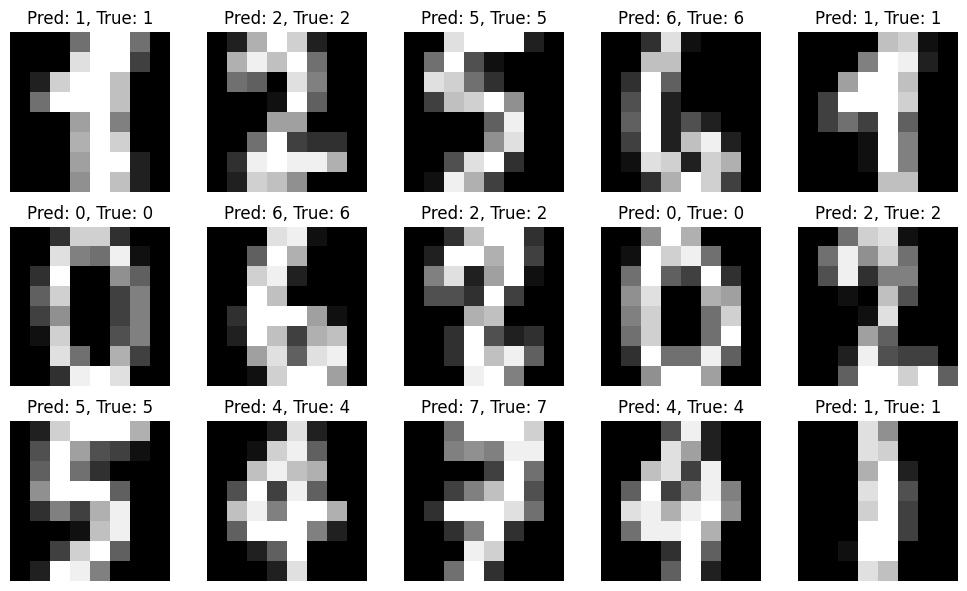

In [ ]:
# Visualization
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
axes = axes.ravel()
for i in range(15):
    img_index = np.random.randint(0, len(X_test))
    axes[i].imshow(X_test[img_index].reshape(8, 8), cmap='gray')
    axes[i].set_title(f"Pred: {predicted[img_index]}, True: {y_test[img_index]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Question 2

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

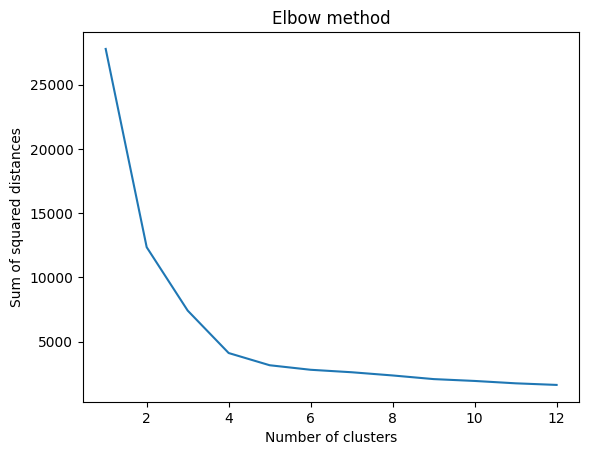

In [ ]:
# Create data
X, y = make_blobs(n_samples = 400, n_features = 2, centers = 5, cluster_std = 2.0, random_state = 100)

ssds = {}

for i in range(1, 13):
  kMeansModel = KMeans(n_clusters = i, random_state = 42)
  kMeansModel.fit(X)
  ssds[i] = kMeansModel.inertia_

plt.plot(ssds.keys(), ssds.values())
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared distances")
plt.title("Elbow method")
plt.show()

In [ ]:
# Question 3

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [ ]:
faces = fetch_olivetti_faces()

X = faces.data
y = faces.target

# Data already appears to be flattened...
print(X.shape)
X = X/1.0

(400, 4096)


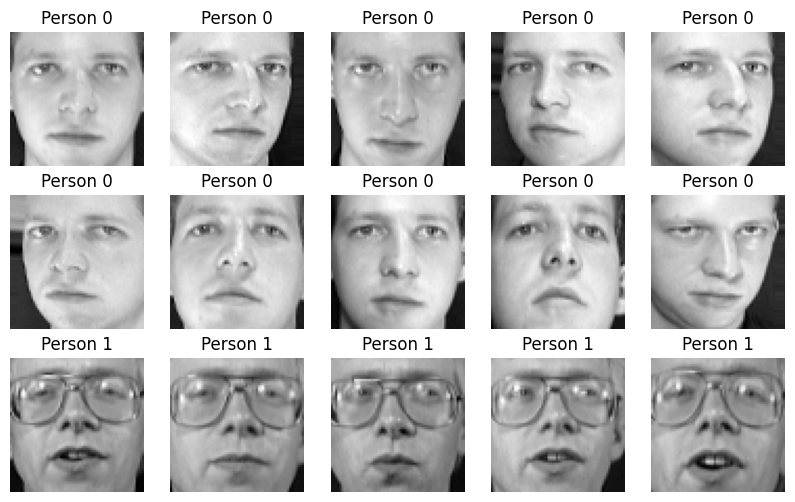

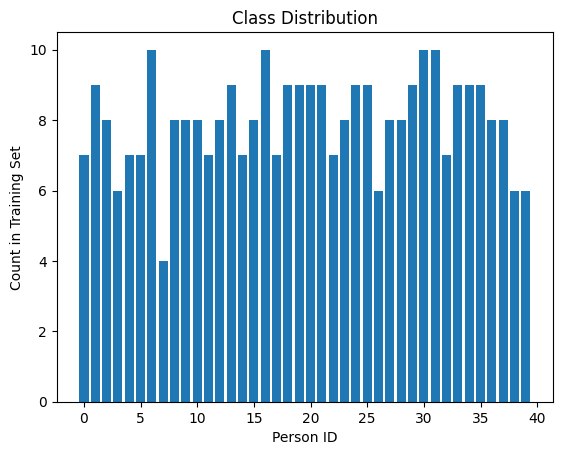

In [ ]:
# Reshape images to 64x64. Initially loaded flattened
X = X.reshape(-1, 64, 64)

# Show first 15 faces
fig, axes = plt.subplots(3, 5, figsize = (10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i], cmap = 'gray')
    ax.set_title(f'Person {y[i]}')
    ax.axis('off')
plt.show()

# Show distribution of faces
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.xlabel('Person ID')
plt.ylabel('Count in Training Set')
plt.title('Class Distribution')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

model = Sequential([
    Flatten(input_shape = (64, 64)),
    Dense(256, activation = 'relu'),
    Dropout(0.5),
    Dense(128, activation = 'relu'),
    Dense(40, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss: " + str(loss))
print("Test accuracy: " + str(accuracy))

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 188ms/step - accuracy: 0.0221 - loss: 4.6989 - val_accuracy: 0.0125 - val_loss: 3.7300
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0519 - loss: 3.7268 - val_accuracy: 0.0000e+00 - val_loss: 3.7090
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0238 - loss: 3.7073 - val_accuracy: 0.0375 - val_loss: 3.6610
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0123 - loss: 3.7022 - val_accuracy: 0.0500 - val_loss: 3.6834
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0453 - loss: 3.6732 - val_accuracy: 0.0250 - val_loss: 3.6866
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0410 - loss: 3.6734 - val_accuracy: 0.0250 - val_loss: 3.7061
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0235 - loss: 3.6614 - val_accuracy: 0.0250 - val_loss: 3.7300
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0398 - loss: 3.6702 - val_accuracy: 0.000

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


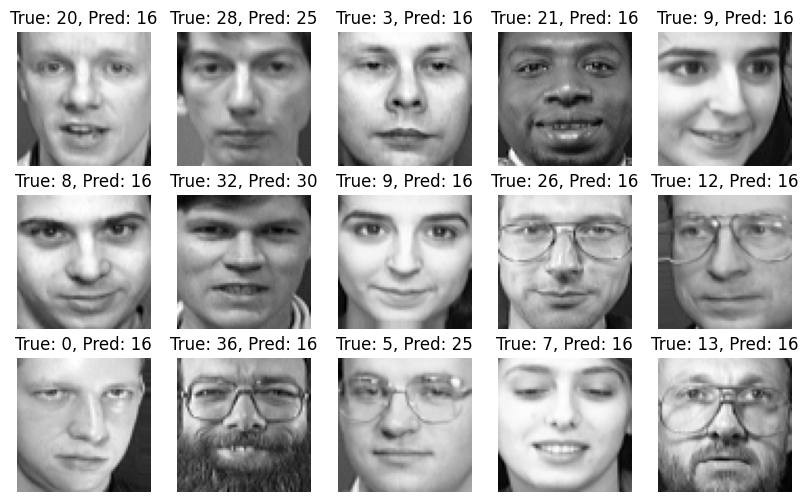

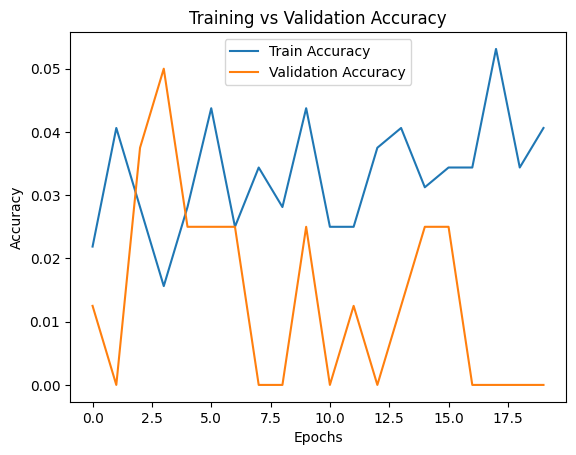

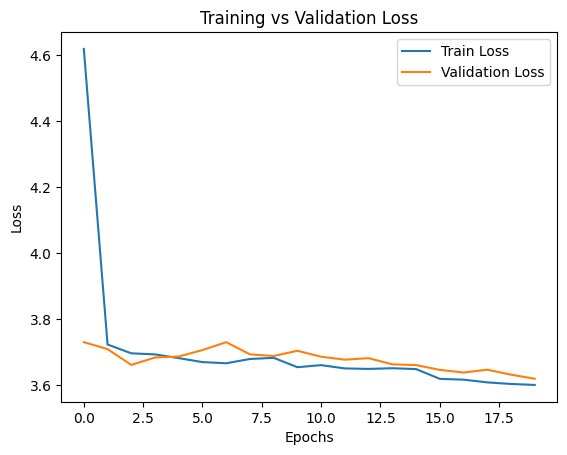

In [ ]:
# Predictions vs true labels
fig, axes = plt.subplots(3, 5, figsize = (10, 6))
y_pred = np.argmax(model.predict(X_test), axis = 1)
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i], cmap = 'gray')
    ax.set_title(f'True: {y_test[i]}, Pred: {y_pred[i]}')
    ax.axis('off')
plt.show()

# Training vs validation accuracy
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# Training vs validation loss
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Question 4

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize color values
train_images = train_images / 255.0
test_images = test_images / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation = 'relu'),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(train_images, train_labels, epochs = 10, batch_size = 64, validation_data = (test_images, test_labels))

loss, accuracy = model.evaluate(test_images, test_labels)
print("Test loss: " + str(loss))
print("Test accuracy: " + str(accuracy))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9117 - loss: 0.2813 - val_accuracy: 0.9826 - val_loss: 0.0502
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9879 - loss: 0.0400 - val_accuracy: 0.9886 - val_loss: 0.0350
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9931 - loss: 0.0220 - val_accuracy: 0.9893 - val_loss: 0.0306
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9948 - loss: 0.0158 - val_accuracy: 0.9911 - val_loss: 0.0288
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9967 - loss: 0.0112 - val_accuracy: 0.9895 - val_loss: 0.0357
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9959 - loss: 0.0108 - val_accuracy: 0.9910 - val_loss: 0.0293
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9977 - loss: 0.0072 - val_accuracy: 0.9906 - val_loss: 0.0311
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9982 - loss: 0.0050 - val_accuracy: 0.

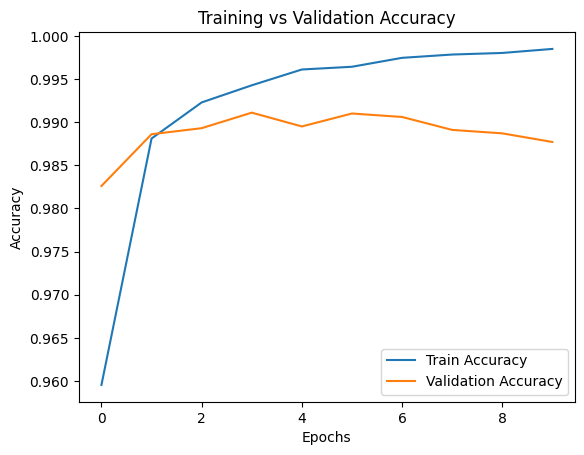

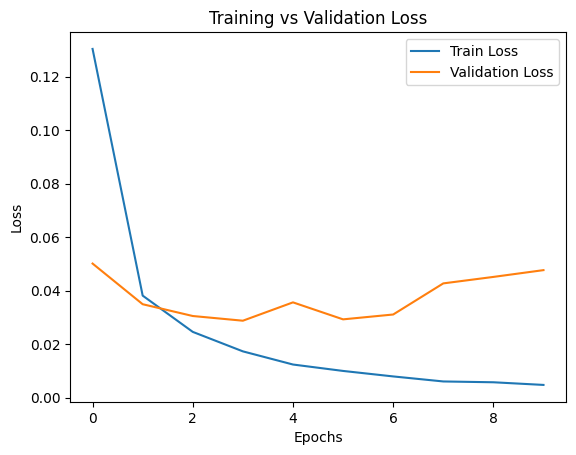

In [ ]:
# Training vs validation accuracy
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# Training vs validation loss
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()